# Clubes de Ciencia México 2021
## 13,800 millones de años de viaje, la historia de nuestro universo

*Instructores:* 

Jose María Ezquiaga (University of Chicago, ezquiaga@uchicago.edu)

Miriam Gudino (UNAM, miriamegy@gmail.com)

Gabriel Missael Barco (TA, Universidad de Guanajuato, missaelgabo@gmail.com)

---

## Actividad 2: La expansión del Universo

En la segunda clase del club de ciencia hemos aprendido sobre la energía y materia oscura. En esta actividad vamos a explorar como cambia la evolución del universo dependiendo de su contenido.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/CMB_universe_expansion.png/1200px-CMB_universe_expansion.png' alt='Alt text' title='Title text' />

Utilizaremos los siguientes paquetes de python

In [1]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt

Para hacer los plots más bonitos

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fontSz = 17
fontsz = 15
fontssz = 13

# Expansión del universo

El factor de escala $a(t)$ determina el tamaño del universo. Su evolución viene dada por las [ecuaciones de Friedmann](https://en.wikipedia.org/wiki/Friedmann_equations). Para esta actividad lo importante será conocer el parametro de Hubble $H(t)\equiv \dot{a}/a$ que determina la evolución del factor de escala:

\begin{equation}
H(z)=H_0\sqrt{\Omega_{DE}+\Omega_{DM}(1+z)^3 +\Omega_{R}(1+z)^4+\Omega_{\kappa}(1+z)^2}\,,
\end{equation}

donde $H_0$ es la constante de Hubble, $\Omega_{DE}$ la abundancia de energía oscura, $\Omega_{DM}$ la abundancia de materia oscura, $\Omega_{R}$ la abundancia de radiación y $\Omega_{\kappa}$ la curvatura. 
En esta ecuación hemos escrito la evolución temporal en función del redshift $z$. 

La abundancia de los distintos componentes debe satisfacer

\begin{equation}
1 = \Omega_{DE} + \Omega_{DM} + \Omega_{R} + \Omega_\kappa\,.
\end{equation}

Las unidades del parametro de Hubble son de frecuencia (1/tiempo). Por razones prácticas a los cosmólogos les gusta utilizar km/s/Mpc (recordad que $1\mathrm{Mpc}=3\cdot10^{22}$m). 

Los parámetros cosmológicos más recientes los puedes encontrar en los resultados del satélite [Planck 2018, Tabla 2](https://arxiv.org/pdf/1807.06209v1.pdf)

In [11]:
def hubble(z,cosmo_param):
    H0 = cosmo_param[0]
    oDE = cosmo_param[1]
    oDM = cosmo_param[2]
    oR = cosmo_param[3]
    oK = cosmo_param[4]
    return H0 * np.sqrt(oDE + oDM * (1.+z)**3 + oR * (1. + z)**4 + oK * (1. + z)**2) #km/s/Mpc

Lo primero que vamos a hacer es un plot del parametro de Hubble como función del redshift

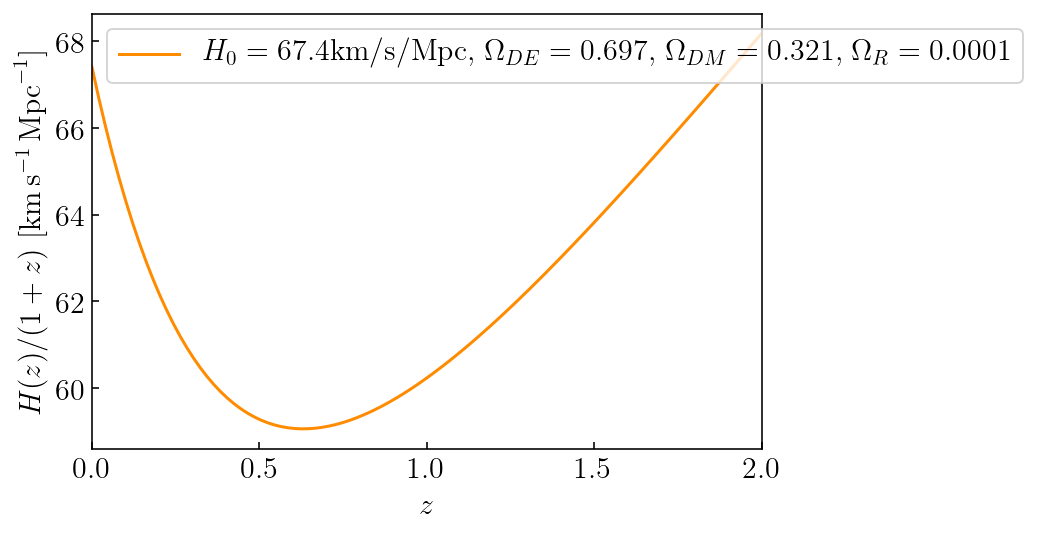

In [17]:
#Definimos el redshift
zs = np.linspace(0,2,100)
#Definimos los parámetros cosmológicos
oM0 = 0.321
oR0 = 1.0e-4
oDE0 = 0.697
oK0 = 1. - oM0 - oR0 - oDE0
H0 = 67.4 #km/Mpc/s
cosmo_param = [H0,oDE0,oM0,oR0,oK0]
#Calculamos el parámetro de Hubble
Hs = hubble(zs,cosmo_param)

#Plot
plt.plot(zs,Hs/(1+zs),color='darkorange',label=r'$H_0=%s$km/s/Mpc, $\Omega_{DE}=%s$, $\Omega_{DM}=%s$, $\Omega_R=%s$' % (H0,oDE0,oM0,oR0))

plt.xlabel(r'$z$',fontsize=fontsz)
plt.ylabel(r'$H(z)/(1+z)$ [km$\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$]',fontsize=fontsz)
plt.xlim([0,max(zs)])
#plt.ylim([55,76])
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.legend(fontsize=fontsz,loc='upper left')
#plt.savefig('hubble_parameter.pdf',bbox_inches ='tight')
plt.show()

*Puedes probar a cambiar los distintos parámetros para ver como cambia la curva*

**Pregunta:** ¿qué información puedes aprender de este plot? ¿cuándo se expande y cuando se contrae el universo? ¿cuándo la expansión es acelerada o decelerada?

---

# ¿Cuál es el futuro de nuestro universo?

Para resolver esta pregunta vamos a resolver directamente la evolución del factor de escala. Recordando la relación entre el factor de escalar y el refshift,

\begin{equation}
a=\frac{1}{1+z}\,,
\end{equation}

de la ecuación anterior tenemos que

\begin{equation}
\left(\frac{da(t)}{dt}\right)^2=a^2H_0^2\left(\Omega_{DE}+\Omega_{DM}a^{-3} +\Omega_{R}a^{-4}+\Omega_{\kappa}a^{-2}\right)\,.
\end{equation}

Para resolver la ecuación diferencial utilizaremos los siguientes paquetes de python

In [5]:
from scipy.integrate import solve_ivp

Vamos a medir el tiempo en unidades del tiempo de Hubble $H_0^{-1}$

In [6]:
def scale_factor_eq(t,a):
    return np.sqrt(np.abs(oDE0 + oK0 * a**(-2.) + oM0 * a**(-3.) + oR0 * a**(-4)))*a
def scale_factor_eq_m(t,a):
    return -np.sqrt(np.abs(oDE0 + oK0 * a**(-2.)  + oM0 * a**(-3.) + oR0 * a**(-4)))*a

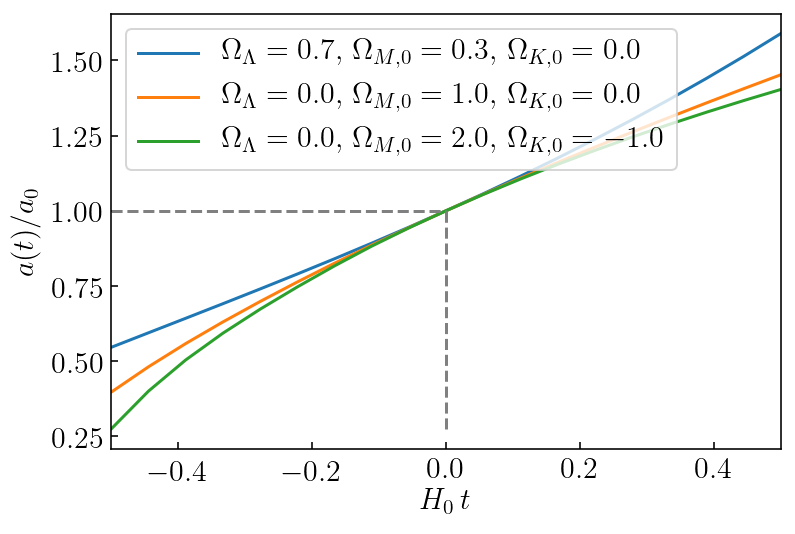

In [10]:
#Parámetros cosmológicos
#(puedes añadir más valores a oM y oDE)
oMs = np.array([0.3,1.,2.])
oDEs = np.array([0.7,0.,0.])
oKs = 1.-oMs-oDEs #Curvatura
oR0 = 1.0e-4 #La radiación la dejamos fija

#tiempo (en unidades H_0^-1)
nt = 10 #(aumentar el número de tiempos mejora el plot pero aumenta el tiempo de computación)
time_p = np.linspace(0,.5,nt)
time_m = np.linspace(0,-0.5,nt)
time_pm = np.linspace(0,.5,nt)

for j in range(0,len(oMs)):
    oM0 = oMs[j]
    oK0 = oKs[j]
    oDE0 = oDEs[j]

    sol_p = solve_ivp(scale_factor_eq, [min(time_p),max(time_p)],[1],t_eval=time_p)
    ascale_p = sol_p.y[0]
    sol_m = solve_ivp(scale_factor_eq_m, [min(time_pm),max(time_pm)],[1],t_eval=time_pm)
    ascale_m = sol_m.y[0]
    ascale_mn = np.zeros(len(ascale_m))
    time_mn = np.zeros(len(time_m))
    for i in range(0,len(ascale_m)):
        ascale_mn[i] = ascale_m[-i-1]
        time_mn[i] = time_m[-i-1] 
    ascale = np.append(ascale_mn,ascale_p)
    time = np.append(time_mn,time_p)
    plt.plot(time,ascale,label=r'$\Omega_\Lambda=%s$, $\Omega_{M,0}=%s$, $\Omega_{K,0}=%s$' % (np.round(oDE0,2),np.round(oM0,2),np.round(oK0,2)))
plt.plot(np.linspace(min(time),0,10),np.ones(10),'--',color='gray')
plt.plot(np.zeros(10),np.linspace(min(ascale),1,10),'--',color='gray')
plt.xlabel(r'$H_0\,t$',fontsize=fontsz)
plt.ylabel(r'$a(t)/a_0$',fontsize=fontsz)
plt.xlim([min(time_m),max(time_p)])
#plt.ylim([0.01,2.])
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.legend(fontsize=fontsz,loc='upper left')
#plt.savefig('expansion_history.pdf',bbox_inches ='tight')
plt.show()

Información adicional: http://ned.ipac.caltech.edu/level5/March01/Carroll3/Carroll8.html

---

## Cosmology in python? 

Use [astropy](https://docs.astropy.org/en/stable/cosmology/index.html)!!